In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### imports

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

### config

In [3]:
%matplotlib notebook
#%matplotlib inline
plt.style.use('ggplot')
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", reshape=False, one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


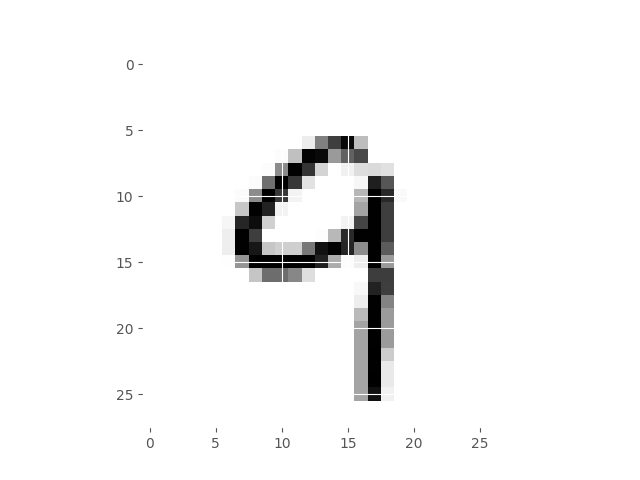

In [6]:
plt.imshow(mnist.train.images[8].reshape(28,28), cmap='Greys', interpolation=None)

In [8]:
mnist.train.labels[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [72]:
mnist.train.next_batch(10)

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [8]:
# variables - degrees of freedom of your code - all the things that you want tensorflow to determine for you
# placeholder - where data goes

In [6]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1]) # None is the batch size (100 in this case), (28x28 images), 1 is the value per pixel (grayscale so 1)
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10]) # one hot encoded labels

In [7]:
W = tf.Variable(tf.zeros([784,10])) # Weights per node
b = tf.Variable(tf.zeros([10])) # biases

In [8]:
# model
XX = tf.reshape(X, [-1, 784]) #reshape to flatten images
Y = tf.nn.softmax(tf.matmul(XX, W) + b)
# The tf.reshape command transforms our 28x28 images into single vectors of 784 pixels. The "-1" in the reshape command means "there is only one possibility". In practice it will be the number of images in a mini-batch.

In [9]:
# loss function
cross_entropy = -tf.reduce_mean(Y_ * tf.log(Y)) * 1000

In [10]:
# accuracy in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) #one hot decoding
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [11]:
# training
learn_rate = 0.003
optimizer = tf.train.GradientDescentOptimizer(learn_rate)
train_step = optimizer.minimize(cross_entropy)

In [12]:
# need to initialize and start a session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
acc_plot_df = pd.DataFrame(index=range(2000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(2000+1), columns=['train','test'])

In [14]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [15]:
for i in range(2000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.11 loss: 230.25854
0: ********* epoch 1 ********* test accuracy:0.098 test loss: 230.25717
10: accuracy:0.68 loss: 106.93823
20: accuracy:0.86 loss: 68.69431
30: accuracy:0.87 loss: 66.87008
40: accuracy:0.84 loss: 58.117542
50: accuracy:0.88 loss: 50.588318
50: ********* epoch 1 ********* test accuracy:0.8615 test loss: 53.1483
60: accuracy:0.9 loss: 41.24958
70: accuracy:0.94 loss: 36.40496
80: accuracy:0.84 loss: 48.665382
90: accuracy:0.88 loss: 47.40873
100: accuracy:0.87 loss: 53.94223
100: ********* epoch 1 ********* test accuracy:0.8896 test loss: 42.590664
110: accuracy:0.91 loss: 39.614918
120: accuracy:0.89 loss: 39.71385
130: accuracy:0.86 loss: 46.892212
140: accuracy:0.87 loss: 44.8834
150: accuracy:0.9 loss: 34.445114
150: ********* epoch 1 ********* test accuracy:0.8965 test loss: 39.178402
160: accuracy:0.91 loss: 37.1252
170: accuracy:0.89 loss: 41.947777
180: accuracy:0.89 loss: 40.205055
190: accuracy:0.94 loss: 33.305447
200: accuracy:0.89 loss: 40.79

1650: accuracy:0.95 loss: 19.49559
1650: ********* epoch 4 ********* test accuracy:0.92 test loss: 28.724035
1660: accuracy:0.87 loss: 33.72541
1670: accuracy:0.98 loss: 19.459318
1680: accuracy:0.88 loss: 26.548035
1690: accuracy:0.92 loss: 27.983582
1700: accuracy:0.95 loss: 18.500513
1700: ********* epoch 4 ********* test accuracy:0.9192 test loss: 29.056875
1710: accuracy:0.92 loss: 25.659422
1720: accuracy:0.85 loss: 34.336014
1730: accuracy:0.93 loss: 34.947742
1740: accuracy:0.89 loss: 40.768925
1750: accuracy:0.91 loss: 26.676125
1750: ********* epoch 4 ********* test accuracy:0.9196 test loss: 28.667374
1760: accuracy:0.95 loss: 25.799232
1770: accuracy:0.94 loss: 27.753586
1780: accuracy:0.93 loss: 28.300459
1790: accuracy:0.95 loss: 24.029587
1800: accuracy:0.92 loss: 33.61075
1800: ********* epoch 4 ********* test accuracy:0.917 test loss: 28.71506
1810: accuracy:0.91 loss: 28.519283
1820: accuracy:0.91 loss: 23.107372
1830: accuracy:0.94 loss: 33.186882
1840: accuracy:0.89

<IPython.core.display.Javascript object>


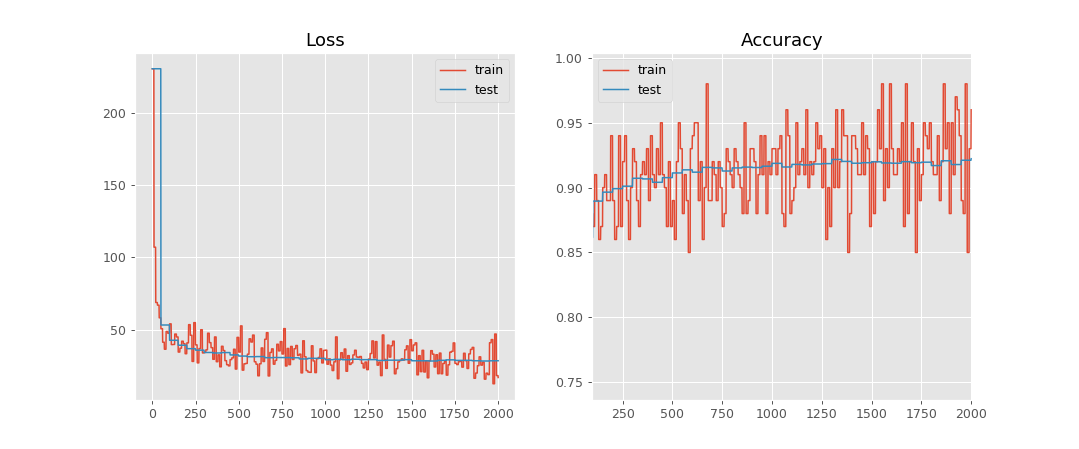

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
loss_plot_df.fillna(method='ffill').plot(ax = axes[0], linewidth=1.2, title='Loss')
acc_plot_df.fillna(method='ffill').plot(ax = axes[1], linewidth=1.2, title='Accuracy')

In [20]:
# maximum test accuracy
acc_plot_df.test.mean()

0.8928951201278988

## Go deep - add more layers

In [34]:
sess.close()

In [33]:
tf.reset_default_graph()

In [35]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1]) # None is the batch size (100 in this case), (28x28 images), 1 is the value per pixel (grayscale so 1)
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10]) # one hot encoded labels

In [36]:
K, L, M, N = 200, 100, 60, 30

In [25]:
#tf.truncated_normal is a TensorFlow function that produces random values following the normal (Gaussian) distribution between -2*stddev and +2*stddev

In [37]:
# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1 = tf.Variable(tf.zeros([K]))

W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1)) #weights initialized with random values
B2 = tf.Variable(tf.zeros([L]))

W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # truncated normal in this case is same as random initialization
B3 = tf.Variable(tf.zeros([M]))

W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B4 = tf.Variable(tf.zeros([N]))

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

In [38]:
# new model
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [39]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [44]:
# accuracy in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) #one hot decoding
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [40]:
# training
learn_rate = 0.003
optimizer = tf.train.GradientDescentOptimizer(learn_rate)
train_step = optimizer.minimize(cross_entropy)

In [41]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [42]:
iters = 6000

In [45]:
acc_plot_df = pd.DataFrame(index=range(iters+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(iters+1), columns=['train','test'])

for i in range(iters+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.06 loss: 235.94135
0: ********* epoch 1 ********* test accuracy:0.101 test loss: 234.13925
10: accuracy:0.13 loss: 229.73386
20: accuracy:0.1 loss: 230.89688
30: accuracy:0.1 loss: 231.13039
40: accuracy:0.13 loss: 230.33226
50: accuracy:0.08 loss: 230.41898
50: ********* epoch 1 ********* test accuracy:0.1032 test loss: 230.38452
60: accuracy:0.12 loss: 230.2985
70: accuracy:0.16 loss: 229.69069
80: accuracy:0.09 loss: 231.42175
90: accuracy:0.14 loss: 229.20456
100: accuracy:0.2 loss: 232.35727
100: ********* epoch 1 ********* test accuracy:0.1135 test loss: 230.6818
110: accuracy:0.13 loss: 228.64268
120: accuracy:0.11 loss: 230.4988
130: accuracy:0.11 loss: 232.41841
140: accuracy:0.04 loss: 231.2364
150: accuracy:0.08 loss: 231.51826
150: ********* epoch 1 ********* test accuracy:0.1032 test loss: 230.7339
160: accuracy:0.13 loss: 229.16641
170: accuracy:0.13 loss: 230.2212
180: accuracy:0.11 loss: 231.10661
190: accuracy:0.15 loss: 229.41492
200: accuracy:0.07 loss:

1660: accuracy:0.21 loss: 227.06792
1670: accuracy:0.14 loss: 225.94923
1680: accuracy:0.17 loss: 224.79082
1690: accuracy:0.16 loss: 224.77577
1700: accuracy:0.33 loss: 221.70299
1700: ********* epoch 4 ********* test accuracy:0.2687 test loss: 223.42665
1710: accuracy:0.38 loss: 220.37607
1720: accuracy:0.27 loss: 218.6659
1730: accuracy:0.18 loss: 222.19894
1740: accuracy:0.32 loss: 216.05777
1750: accuracy:0.19 loss: 211.48024
1750: ********* epoch 4 ********* test accuracy:0.2032 test loss: 212.98444
1760: accuracy:0.26 loss: 210.61829
1770: accuracy:0.2 loss: 213.32755
1780: accuracy:0.26 loss: 203.57408
1790: accuracy:0.25 loss: 198.3432
1800: accuracy:0.24 loss: 199.19434
1800: ********* epoch 4 ********* test accuracy:0.281 test loss: 193.77617
1810: accuracy:0.35 loss: 192.09058
1820: accuracy:0.26 loss: 188.1973
1830: accuracy:0.29 loss: 182.15674
1840: accuracy:0.34 loss: 185.37656
1850: accuracy:0.24 loss: 181.79893
1850: ********* epoch 4 ********* test accuracy:0.262 tes

3300: accuracy:0.73 loss: 76.77825
3300: ********* epoch 7 ********* test accuracy:0.7521 test loss: 75.41582
3310: accuracy:0.8 loss: 64.76451
3320: accuracy:0.69 loss: 83.89613
3330: accuracy:0.7 loss: 90.823
3340: accuracy:0.83 loss: 66.4021
3350: accuracy:0.76 loss: 87.78991
3350: ********* epoch 7 ********* test accuracy:0.7967 test loss: 69.29094
3360: accuracy:0.77 loss: 63.728756
3370: accuracy:0.77 loss: 63.554962
3380: accuracy:0.81 loss: 70.65912
3390: accuracy:0.76 loss: 70.16428
3400: accuracy:0.81 loss: 56.766808
3400: ********* epoch 7 ********* test accuracy:0.7977 test loss: 66.819145
3410: accuracy:0.77 loss: 73.40258
3420: accuracy:0.74 loss: 68.34818
3430: accuracy:0.87 loss: 59.69679
3440: accuracy:0.86 loss: 53.421738
3450: accuracy:0.83 loss: 65.06198
3450: ********* epoch 7 ********* test accuracy:0.8002 test loss: 65.37256
3460: accuracy:0.81 loss: 64.76678
3470: accuracy:0.8 loss: 72.75845
3480: accuracy:0.81 loss: 54.65255
3490: accuracy:0.81 loss: 72.49868
3

4940: accuracy:0.88 loss: 34.08193
4950: accuracy:0.91 loss: 24.47436
4950: ********* epoch 10 ********* test accuracy:0.9209 test loss: 29.283392
4960: accuracy:0.9 loss: 32.354214
4970: accuracy:0.89 loss: 34.660763
4980: accuracy:0.88 loss: 33.744015
4990: accuracy:0.97 loss: 20.7244
5000: accuracy:0.88 loss: 37.95632
5000: ********* epoch 10 ********* test accuracy:0.9072 test loss: 32.73151
5010: accuracy:0.95 loss: 21.772993
5020: accuracy:0.92 loss: 36.139866
5030: accuracy:0.92 loss: 35.58838
5040: accuracy:0.93 loss: 29.643354
5050: accuracy:0.94 loss: 17.715218
5050: ********* epoch 10 ********* test accuracy:0.9206 test loss: 28.74121
5060: accuracy:0.94 loss: 27.51691
5070: accuracy:0.96 loss: 18.421225
5080: accuracy:0.98 loss: 13.594397
5090: accuracy:0.96 loss: 13.16991
5100: accuracy:0.95 loss: 22.835693
5100: ********* epoch 10 ********* test accuracy:0.9242 test loss: 28.453922
5110: accuracy:0.95 loss: 23.731897
5120: accuracy:0.92 loss: 32.016235
5130: accuracy:0.92

<IPython.core.display.Javascript object>


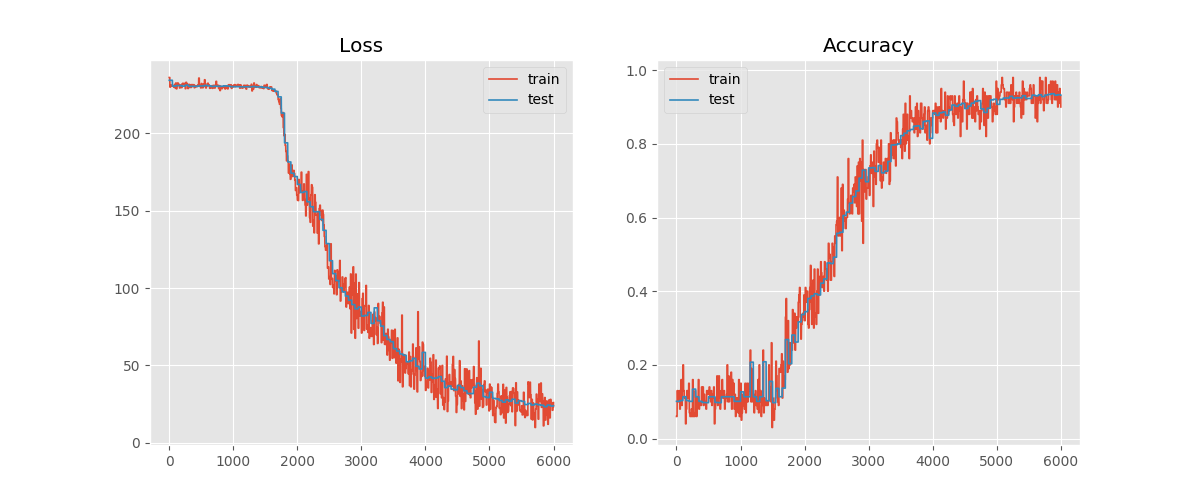

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
loss_plot_df.fillna(method='ffill').plot(ax = axes[0], linewidth=1.2, title='Loss')
acc_plot_df.fillna(method='ffill').plot(ax = axes[1], linewidth=1.2, title='Accuracy')

In [73]:
sess.close()

## try relu because stuck at 0.1 accuracy - ReLU activation with Adam optimizer

In [55]:
sess.close()

In [56]:
tf.reset_default_graph()

In [57]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1]) # None is the batch size (100 in this case), (28x28 images), 1 is the value per pixel (grayscale so 1)
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10]) # one hot encoded labels

In [58]:
K, L, M, N = 200, 100, 60, 30

## initialisation with Relu - use tf.ones for biases

In [59]:
# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1 = tf.Variable(tf.ones([K])/10)

W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1)) #weights initialized with random values
B2 = tf.Variable(tf.ones([L])/10)

W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # truncated normal in this case is same as random initialization
B3 = tf.Variable(tf.ones([M])/10)

W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

In [60]:
# new model
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [61]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [62]:
# accuracy in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) #one hot decoding
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [63]:
# training
learn_rate = 0.003
optimizer = tf.train.AdamOptimizer(learn_rate)
train_step = optimizer.minimize(cross_entropy)

In [64]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [65]:
iters = 6000

In [66]:
acc_plot_df = pd.DataFrame(index=range(iters+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(iters+1), columns=['train','test'])

for i in range(iters+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.01 loss: 233.03351
0: ********* epoch 1 ********* test accuracy:0.0995 test loss: 231.77068
10: accuracy:0.38 loss: 184.82253
20: accuracy:0.77 loss: 92.94019
30: accuracy:0.87 loss: 49.354076
40: accuracy:0.74 loss: 89.187294
50: accuracy:0.87 loss: 45.54436
50: ********* epoch 1 ********* test accuracy:0.865 test loss: 44.94374
60: accuracy:0.87 loss: 47.25356
70: accuracy:0.83 loss: 47.80439
80: accuracy:0.9 loss: 35.144447
90: accuracy:0.91 loss: 37.575943
100: accuracy:0.86 loss: 44.061222
100: ********* epoch 1 ********* test accuracy:0.8892 test loss: 34.933506
110: accuracy:0.92 loss: 27.830986
120: accuracy:0.96 loss: 20.10123
130: accuracy:0.9 loss: 21.797884
140: accuracy:0.96 loss: 27.026245
150: accuracy:0.93 loss: 22.58358
150: ********* epoch 1 ********* test accuracy:0.9298 test loss: 23.731552
160: accuracy:0.92 loss: 20.30719
170: accuracy:0.91 loss: 24.365673
180: accuracy:0.94 loss: 16.525213
190: accuracy:0.92 loss: 20.06885
200: accuracy:0.94 loss: 2

1650: ********* epoch 4 ********* test accuracy:0.9739 test loss: 9.38329
1660: accuracy:1.0 loss: 2.3470469
1670: accuracy:1.0 loss: 3.1516368
1680: accuracy:1.0 loss: 1.5968001
1690: accuracy:0.98 loss: 17.383415
1700: accuracy:0.99 loss: 2.659622
1700: ********* epoch 4 ********* test accuracy:0.9739 test loss: 8.874851
1710: accuracy:0.99 loss: 4.215327
1720: accuracy:1.0 loss: 0.8874718
1730: accuracy:0.95 loss: 11.885253
1740: accuracy:0.95 loss: 19.562084
1750: accuracy:0.99 loss: 5.064751
1750: ********* epoch 4 ********* test accuracy:0.9612 test loss: 13.035684
1760: accuracy:0.99 loss: 2.5428066
1770: accuracy:0.97 loss: 7.7452717
1780: accuracy:0.96 loss: 21.999813
1790: accuracy:0.98 loss: 8.730352
1800: accuracy:0.97 loss: 9.481453
1800: ********* epoch 4 ********* test accuracy:0.9698 test loss: 9.960475
1810: accuracy:1.0 loss: 0.5980439
1820: accuracy:0.99 loss: 1.8898523
1830: accuracy:0.95 loss: 15.57222
1840: accuracy:0.99 loss: 3.9178555
1850: accuracy:0.97 loss: 7

3300: ********* epoch 7 ********* test accuracy:0.9739 test loss: 9.837737
3310: accuracy:1.0 loss: 0.39994636
3320: accuracy:0.99 loss: 2.0326822
3330: accuracy:0.97 loss: 7.780713
3340: accuracy:0.99 loss: 4.058343
3350: accuracy:0.98 loss: 8.347512
3350: ********* epoch 7 ********* test accuracy:0.9714 test loss: 11.674578
3360: accuracy:0.98 loss: 6.6408677
3370: accuracy:1.0 loss: 1.8860584
3380: accuracy:0.99 loss: 4.3704724
3390: accuracy:0.97 loss: 8.805193
3400: accuracy:0.95 loss: 12.933798
3400: ********* epoch 7 ********* test accuracy:0.9758 test loss: 9.270031
3410: accuracy:1.0 loss: 2.1563663
3420: accuracy:0.99 loss: 1.5820589
3430: accuracy:1.0 loss: 0.6732837
3440: accuracy:1.0 loss: 0.8436133
3450: accuracy:0.97 loss: 5.0898867
3450: ********* epoch 7 ********* test accuracy:0.9756 test loss: 9.229929
3460: accuracy:0.99 loss: 5.246055
3470: accuracy:1.0 loss: 0.7005981
3480: accuracy:0.98 loss: 8.79056
3490: accuracy:0.98 loss: 5.758525
3500: accuracy:0.99 loss: 7.

4950: ********* epoch 10 ********* test accuracy:0.9779 test loss: 10.583441
4960: accuracy:0.99 loss: 5.1510143
4970: accuracy:1.0 loss: 0.49935403
4980: accuracy:0.98 loss: 4.2100754
4990: accuracy:0.99 loss: 2.50773
5000: accuracy:0.99 loss: 6.530889
5000: ********* epoch 10 ********* test accuracy:0.9744 test loss: 11.828642
5010: accuracy:0.98 loss: 4.76936
5020: accuracy:0.99 loss: 1.9659154
5030: accuracy:1.0 loss: 0.26511803
5040: accuracy:0.99 loss: 2.2400267
5050: accuracy:0.99 loss: 2.5252984
5050: ********* epoch 10 ********* test accuracy:0.975 test loss: 10.759008
5060: accuracy:0.99 loss: 1.707538
5070: accuracy:0.96 loss: 14.174978
5080: accuracy:0.97 loss: 13.874665
5090: accuracy:1.0 loss: 0.4149728
5100: accuracy:0.99 loss: 1.8469505
5100: ********* epoch 10 ********* test accuracy:0.9754 test loss: 10.12838
5110: accuracy:0.98 loss: 3.5848775
5120: accuracy:0.99 loss: 2.774742
5130: accuracy:0.98 loss: 3.4322221
5140: accuracy:1.0 loss: 2.3372347
5150: accuracy:0.99

<IPython.core.display.Javascript object>


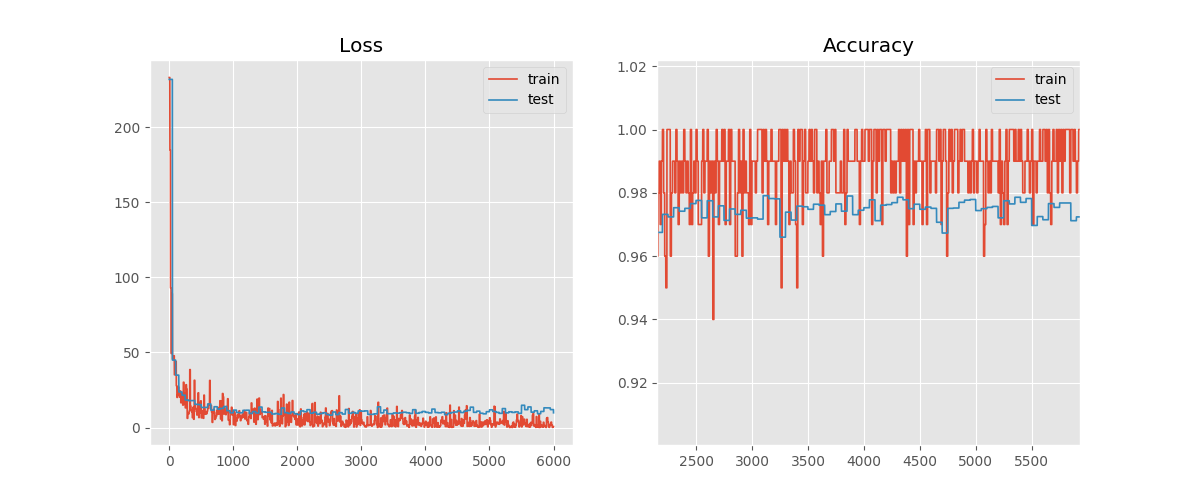

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
loss_plot_df.fillna(method='ffill').plot(ax = axes[0], linewidth=1.2, title='Loss')
acc_plot_df.fillna(method='ffill').plot(ax = axes[1], linewidth=1.2, title='Accuracy')

## add lr decay to avoid noise

In [68]:
sess.close()

In [69]:
# decayed learning rate
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
step = tf.placeholder(tf.int32)
lr = 0.0001 + tf.train.exponential_decay(0.003, step, 2000, 1/math.e)
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cross_entropy)

In [70]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, step: i}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, step: i})
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, step:i})

In [71]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [72]:
acc_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
for i in range(10000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.12 loss: 229.92703
0: ********* epoch 1 ********* test accuracy:0.1126 test loss: 229.96419
10: accuracy:0.72 loss: 111.47381
20: accuracy:0.73 loss: 66.971436
30: accuracy:0.85 loss: 62.15031
40: accuracy:0.79 loss: 65.405174
50: accuracy:0.84 loss: 45.011997
50: ********* epoch 1 ********* test accuracy:0.8781 test loss: 39.925568
60: accuracy:0.88 loss: 43.079906
70: accuracy:0.86 loss: 46.21981
80: accuracy:0.91 loss: 40.03085
90: accuracy:0.87 loss: 41.63926
100: accuracy:0.94 loss: 28.642794
100: ********* epoch 1 ********* test accuracy:0.9198 test loss: 26.103344
110: accuracy:0.95 loss: 26.23638
120: accuracy:0.9 loss: 35.1688
130: accuracy:0.88 loss: 34.699238
140: accuracy:0.97 loss: 12.446108
150: accuracy:0.88 loss: 55.368103
150: ********* epoch 1 ********* test accuracy:0.9227 test loss: 24.601707
160: accuracy:0.93 loss: 18.707111
170: accuracy:0.9 loss: 22.17889
180: accuracy:0.96 loss: 23.800392
190: accuracy:0.91 loss: 30.417404
200: accuracy:0.93 loss:

1650: ********* epoch 4 ********* test accuracy:0.9744 test loss: 8.580025
1660: accuracy:0.96 loss: 8.004179
1670: accuracy:0.99 loss: 3.8444507
1680: accuracy:0.99 loss: 2.26452
1690: accuracy:0.99 loss: 3.953149
1700: accuracy:0.98 loss: 3.8680167
1700: ********* epoch 4 ********* test accuracy:0.9773 test loss: 8.063011
1710: accuracy:0.98 loss: 5.4784474
1720: accuracy:0.99 loss: 2.4626777
1730: accuracy:1.0 loss: 1.7936014
1740: accuracy:0.99 loss: 2.7355738
1750: accuracy:0.99 loss: 3.3062983
1750: ********* epoch 4 ********* test accuracy:0.976 test loss: 8.052936
1760: accuracy:0.97 loss: 6.92957
1770: accuracy:0.99 loss: 4.2966113
1780: accuracy:0.97 loss: 11.293404
1790: accuracy:0.98 loss: 7.076809
1800: accuracy:0.99 loss: 3.8572855
1800: ********* epoch 4 ********* test accuracy:0.9737 test loss: 9.069259
1810: accuracy:1.0 loss: 1.6274266
1820: accuracy:0.98 loss: 4.812184
1830: accuracy:0.98 loss: 3.4038897
1840: accuracy:0.99 loss: 1.3766524
1850: accuracy:0.99 loss: 6

3300: ********* epoch 7 ********* test accuracy:0.9822 test loss: 7.498259
3310: accuracy:0.99 loss: 1.5886344
3320: accuracy:1.0 loss: 0.09008107
3330: accuracy:1.0 loss: 0.3514261
3340: accuracy:1.0 loss: 0.112484336
3350: accuracy:1.0 loss: 0.3344826
3350: ********* epoch 7 ********* test accuracy:0.982 test loss: 7.531529
3360: accuracy:1.0 loss: 0.66512805
3370: accuracy:1.0 loss: 0.75470316
3380: accuracy:1.0 loss: 1.1863585
3390: accuracy:1.0 loss: 0.9227087
3400: accuracy:1.0 loss: 0.5323292
3400: ********* epoch 7 ********* test accuracy:0.9809 test loss: 7.727433
3410: accuracy:1.0 loss: 0.09216635
3420: accuracy:0.99 loss: 1.1162964
3430: accuracy:1.0 loss: 0.19523893
3440: accuracy:0.99 loss: 0.7936625
3450: accuracy:1.0 loss: 0.40461057
3450: ********* epoch 7 ********* test accuracy:0.9799 test loss: 8.210222
3460: accuracy:1.0 loss: 0.2633372
3470: accuracy:1.0 loss: 0.17385876
3480: accuracy:1.0 loss: 0.23240952
3490: accuracy:0.99 loss: 1.95488
3500: accuracy:1.0 loss:

4930: accuracy:1.0 loss: 0.05128134
4940: accuracy:1.0 loss: 0.043203942
4950: accuracy:1.0 loss: 0.54643583
4950: ********* epoch 10 ********* test accuracy:0.9818 test loss: 8.676939
4960: accuracy:1.0 loss: 0.22675253
4970: accuracy:1.0 loss: 0.049283337
4980: accuracy:1.0 loss: 0.0038826594
4990: accuracy:1.0 loss: 0.04767827
5000: accuracy:1.0 loss: 0.2505497
5000: ********* epoch 10 ********* test accuracy:0.9816 test loss: 8.77773
5010: accuracy:1.0 loss: 0.059248384
5020: accuracy:1.0 loss: 0.013266198
5030: accuracy:1.0 loss: 0.14199863
5040: accuracy:1.0 loss: 0.046282142
5050: accuracy:1.0 loss: 0.080705024
5050: ********* epoch 10 ********* test accuracy:0.9803 test loss: 8.942976
5060: accuracy:1.0 loss: 0.09222096
5070: accuracy:1.0 loss: 0.010803142
5080: accuracy:1.0 loss: 0.19326872
5090: accuracy:1.0 loss: 0.14792064
5100: accuracy:1.0 loss: 0.31100285
5100: ********* epoch 10 ********* test accuracy:0.9817 test loss: 8.939457
5110: accuracy:1.0 loss: 0.03922526
5120:

6530: accuracy:1.0 loss: 0.007589029
6540: accuracy:1.0 loss: 0.31011248
6550: accuracy:1.0 loss: 0.010160946
6550: ********* epoch 12 ********* test accuracy:0.982 test loss: 9.521182
6560: accuracy:1.0 loss: 0.04042244
6570: accuracy:1.0 loss: 0.014399424
6580: accuracy:1.0 loss: 0.03453752
6590: accuracy:1.0 loss: 0.008086651
6600: accuracy:1.0 loss: 0.075446725
6600: ********* epoch 13 ********* test accuracy:0.9816 test loss: 9.631515
6610: accuracy:1.0 loss: 0.057349104
6620: accuracy:1.0 loss: 0.051799197
6630: accuracy:1.0 loss: 0.01190452
6640: accuracy:1.0 loss: 0.019353174
6650: accuracy:1.0 loss: 0.02629569
6650: ********* epoch 13 ********* test accuracy:0.9817 test loss: 9.574666
6660: accuracy:1.0 loss: 0.021840144
6670: accuracy:1.0 loss: 0.0074205133
6680: accuracy:1.0 loss: 0.047816724
6690: accuracy:1.0 loss: 0.03414024
6700: accuracy:1.0 loss: 0.020013465
6700: ********* epoch 13 ********* test accuracy:0.9823 test loss: 9.51962
6710: accuracy:1.0 loss: 0.022508984


8120: accuracy:1.0 loss: 0.037728257
8130: accuracy:1.0 loss: 0.0025823538
8140: accuracy:1.0 loss: 0.009625728
8150: accuracy:1.0 loss: 0.0050853463
8150: ********* epoch 15 ********* test accuracy:0.9818 test loss: 10.384367
8160: accuracy:1.0 loss: 0.021152928
8170: accuracy:1.0 loss: 0.03625427
8180: accuracy:1.0 loss: 0.012652521
8190: accuracy:1.0 loss: 0.00833299
8200: accuracy:1.0 loss: 0.128465
8200: ********* epoch 15 ********* test accuracy:0.9818 test loss: 10.394602
8210: accuracy:1.0 loss: 0.0010671981
8220: accuracy:1.0 loss: 0.003656994
8230: accuracy:1.0 loss: 0.001440015
8240: accuracy:1.0 loss: 0.003896294
8250: accuracy:1.0 loss: 0.0022143114
8250: ********* epoch 16 ********* test accuracy:0.9817 test loss: 10.490836
8260: accuracy:1.0 loss: 0.021865927
8270: accuracy:1.0 loss: 0.0015664675
8280: accuracy:1.0 loss: 0.0378151
8290: accuracy:1.0 loss: 0.014077895
8300: accuracy:1.0 loss: 0.027857292
8300: ********* epoch 16 ********* test accuracy:0.9818 test loss: 1

9700: ********* epoch 18 ********* test accuracy:0.9818 test loss: 11.266582
9710: accuracy:1.0 loss: 0.002151439
9720: accuracy:1.0 loss: 0.11016262
9730: accuracy:1.0 loss: 0.0013188851
9740: accuracy:1.0 loss: 0.023557313
9750: accuracy:1.0 loss: 0.002312728
9750: ********* epoch 18 ********* test accuracy:0.982 test loss: 11.274346
9760: accuracy:1.0 loss: 0.06731601
9770: accuracy:1.0 loss: 0.017932834
9780: accuracy:1.0 loss: 0.0045953505
9790: accuracy:1.0 loss: 0.012357471
9800: accuracy:1.0 loss: 0.0017270846
9800: ********* epoch 18 ********* test accuracy:0.9821 test loss: 11.323621
9810: accuracy:1.0 loss: 0.017274667
9820: accuracy:1.0 loss: 0.02596115
9830: accuracy:1.0 loss: 0.002716251
9840: accuracy:1.0 loss: 0.0063066566
9850: accuracy:1.0 loss: 0.013456449
9850: ********* epoch 18 ********* test accuracy:0.9819 test loss: 11.341587
9860: accuracy:1.0 loss: 0.0011602206
9870: accuracy:1.0 loss: 0.010033093
9880: accuracy:1.0 loss: 0.015252115
9890: accuracy:1.0 loss: 

<IPython.core.display.Javascript object>


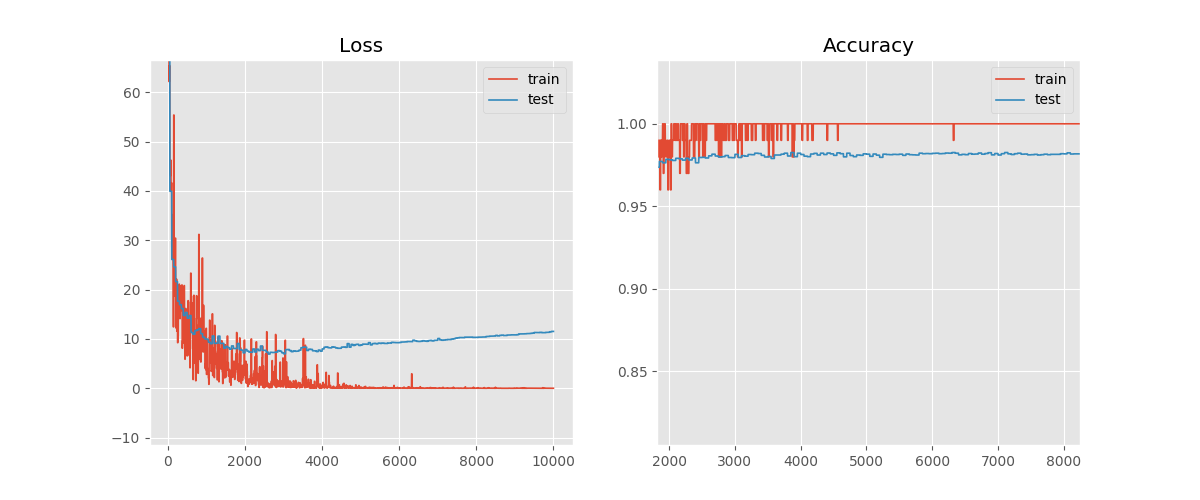

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
loss_plot_df.fillna(method='ffill').plot(ax = axes[0], linewidth=1.2, title='Loss')
acc_plot_df.fillna(method='ffill').plot(ax = axes[1], linewidth=1.2, title='Accuracy')

## add dropout to avoid overfitting

In [81]:
sess.close()

In [82]:
tf.reset_default_graph()

In [83]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1]) # None is the batch size (100 in this case), (28x28 images), 1 is the value per pixel (grayscale so 1)
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10]) # one hot encoded labels

In [84]:
K, L, M, N = 200, 100, 60, 30

## initialisation with Relu - use tf.ones for biases

In [85]:
# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1 = tf.Variable(tf.ones([K])/10)

W2 = tf.Variable(tf.truncated_normal([K, L], stddev=0.1)) #weights initialized with random values
B2 = tf.Variable(tf.ones([L])/10)

W3 = tf.Variable(tf.truncated_normal([L, M], stddev=0.1)) # truncated normal in this case is same as random initialization
B3 = tf.Variable(tf.ones([M])/10)

W4 = tf.Variable(tf.truncated_normal([M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)

W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

In [86]:
# regularization - dropout

pkeep = tf.placeholder(tf.float32) #prob of neuron staying alive
# The model, with dropout at each layer
XX = tf.reshape(X, [-1, 28*28])

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y1d = tf.nn.dropout(Y1, pkeep)

Y2 = tf.nn.relu(tf.matmul(Y1d, W2) + B2)
Y2d = tf.nn.dropout(Y2, pkeep)

Y3 = tf.nn.relu(tf.matmul(Y2d, W3) + B3)
Y3d = tf.nn.dropout(Y3, pkeep)

Y4 = tf.nn.relu(tf.matmul(Y3d, W4) + B4)
Y4d = tf.nn.dropout(Y4, pkeep)

Ylogits = tf.matmul(Y4d, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [87]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [88]:
# accuracy in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) #one hot decoding
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [89]:
# decayed learning rate
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
step = tf.placeholder(tf.int32)
lr = 0.0001 + tf.train.exponential_decay(0.003, step, 2000, 1/math.e)
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cross_entropy)

In [90]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, step: i, pkeep: 1.0}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, step: i, pkeep:1.0})
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, step:i, pkeep:0.75})

In [91]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [92]:
acc_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(10000+1), columns=['train','test'])
for i in range(10000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.09 loss: 231.512
0: ********* epoch 1 ********* test accuracy:0.0906 test loss: 231.94974
10: accuracy:0.37 loss: 199.34062
20: accuracy:0.59 loss: 136.72885
30: accuracy:0.73 loss: 103.32544
40: accuracy:0.79 loss: 73.62728
50: accuracy:0.79 loss: 67.36479
50: ********* epoch 1 ********* test accuracy:0.8356 test loss: 54.81406
60: accuracy:0.79 loss: 56.723957
70: accuracy:0.85 loss: 42.604183
80: accuracy:0.89 loss: 42.305145
90: accuracy:0.88 loss: 45.45606
100: accuracy:0.86 loss: 51.356487
100: ********* epoch 1 ********* test accuracy:0.891 test loss: 38.090508
110: accuracy:0.86 loss: 55.175133
120: accuracy:0.88 loss: 47.44943
130: accuracy:0.92 loss: 29.685017
140: accuracy:0.91 loss: 34.569702
150: accuracy:0.88 loss: 28.415998
150: ********* epoch 1 ********* test accuracy:0.9067 test loss: 31.523714
160: accuracy:0.92 loss: 25.09619
170: accuracy:0.92 loss: 40.304173
180: accuracy:0.89 loss: 34.23041
190: accuracy:0.93 loss: 30.3419
200: accuracy:0.9 loss: 26

1660: accuracy:0.97 loss: 8.891123
1670: accuracy:0.98 loss: 3.1865656
1680: accuracy:0.95 loss: 11.051181
1690: accuracy:1.0 loss: 2.2286398
1700: accuracy:0.97 loss: 33.785786
1700: ********* epoch 4 ********* test accuracy:0.9695 test loss: 10.970226
1710: accuracy:0.99 loss: 2.8403776
1720: accuracy:0.95 loss: 24.27951
1730: accuracy:0.99 loss: 3.2413502
1740: accuracy:0.99 loss: 5.6867
1750: accuracy:0.97 loss: 16.225689
1750: ********* epoch 4 ********* test accuracy:0.9701 test loss: 11.155217
1760: accuracy:0.99 loss: 2.2394953
1770: accuracy:0.98 loss: 9.312423
1780: accuracy:0.97 loss: 15.402789
1790: accuracy:0.99 loss: 3.6867678
1800: accuracy:0.97 loss: 12.411301
1800: ********* epoch 4 ********* test accuracy:0.9707 test loss: 11.185836
1810: accuracy:0.98 loss: 4.090265
1820: accuracy:0.99 loss: 6.3757277
1830: accuracy:0.97 loss: 11.7420025
1840: accuracy:0.95 loss: 20.018349
1850: accuracy:0.98 loss: 7.1920843
1850: ********* epoch 4 ********* test accuracy:0.9694 test

3300: ********* epoch 7 ********* test accuracy:0.9763 test loss: 9.542711
3310: accuracy:0.98 loss: 7.8870616
3320: accuracy:0.99 loss: 4.0560575
3330: accuracy:0.98 loss: 6.414595
3340: accuracy:0.98 loss: 3.2090669
3350: accuracy:0.97 loss: 4.288426
3350: ********* epoch 7 ********* test accuracy:0.977 test loss: 9.146144
3360: accuracy:0.98 loss: 3.7635279
3370: accuracy:1.0 loss: 0.49032682
3380: accuracy:0.98 loss: 6.15559
3390: accuracy:0.99 loss: 3.9668624
3400: accuracy:0.97 loss: 10.057145
3400: ********* epoch 7 ********* test accuracy:0.9778 test loss: 8.5470085
3410: accuracy:0.99 loss: 2.1673386
3420: accuracy:1.0 loss: 0.76202786
3430: accuracy:1.0 loss: 0.5647353
3440: accuracy:1.0 loss: 1.251413
3450: accuracy:0.99 loss: 3.5137103
3450: ********* epoch 7 ********* test accuracy:0.9785 test loss: 8.588076
3460: accuracy:0.99 loss: 2.3138866
3470: accuracy:0.98 loss: 7.4701643
3480: accuracy:0.97 loss: 15.53475
3490: accuracy:0.99 loss: 3.1463952
3500: accuracy:0.99 loss

4950: ********* epoch 10 ********* test accuracy:0.9791 test loss: 8.43343
4960: accuracy:1.0 loss: 0.17865944
4970: accuracy:0.99 loss: 4.2249513
4980: accuracy:0.99 loss: 5.938639
4990: accuracy:1.0 loss: 0.61322427
5000: accuracy:1.0 loss: 1.6039027
5000: ********* epoch 10 ********* test accuracy:0.9791 test loss: 8.187561
5010: accuracy:1.0 loss: 0.64872694
5020: accuracy:1.0 loss: 1.941017
5030: accuracy:0.98 loss: 2.2236636
5040: accuracy:0.99 loss: 1.1217755
5050: accuracy:1.0 loss: 0.30959344
5050: ********* epoch 10 ********* test accuracy:0.9784 test loss: 8.509045
5060: accuracy:0.98 loss: 4.7778487
5070: accuracy:0.98 loss: 7.5540624
5080: accuracy:0.99 loss: 3.0234852
5090: accuracy:0.98 loss: 3.7309437
5100: accuracy:0.99 loss: 3.377433
5100: ********* epoch 10 ********* test accuracy:0.9788 test loss: 8.467111
5110: accuracy:0.96 loss: 9.259273
5120: accuracy:0.98 loss: 10.508571
5130: accuracy:0.99 loss: 2.137085
5140: accuracy:0.98 loss: 7.449684
5150: accuracy:1.0 lo

6600: ********* epoch 13 ********* test accuracy:0.9788 test loss: 8.927839
6610: accuracy:0.98 loss: 3.0204446
6620: accuracy:0.99 loss: 2.3268793
6630: accuracy:1.0 loss: 0.22691922
6640: accuracy:0.99 loss: 4.031821
6650: accuracy:1.0 loss: 0.15179871
6650: ********* epoch 13 ********* test accuracy:0.9796 test loss: 8.782375
6660: accuracy:1.0 loss: 1.7707179
6670: accuracy:1.0 loss: 1.679324
6680: accuracy:0.99 loss: 2.9469082
6690: accuracy:1.0 loss: 0.30999506
6700: accuracy:0.99 loss: 4.251048
6700: ********* epoch 13 ********* test accuracy:0.9799 test loss: 8.697162
6710: accuracy:0.99 loss: 3.107066
6720: accuracy:1.0 loss: 0.32182392
6730: accuracy:0.98 loss: 15.599515
6740: accuracy:1.0 loss: 0.20873912
6750: accuracy:0.99 loss: 3.3542414
6750: ********* epoch 13 ********* test accuracy:0.9802 test loss: 8.64484
6760: accuracy:1.0 loss: 0.57888633
6770: accuracy:1.0 loss: 0.9439857
6780: accuracy:1.0 loss: 0.08849018
6790: accuracy:0.99 loss: 1.655864
6800: accuracy:1.0 lo

8230: accuracy:1.0 loss: 1.2238207
8240: accuracy:0.99 loss: 3.3414204
8250: accuracy:1.0 loss: 1.2442362
8250: ********* epoch 16 ********* test accuracy:0.9807 test loss: 8.580488
8260: accuracy:1.0 loss: 0.25492835
8270: accuracy:0.99 loss: 9.71163
8280: accuracy:1.0 loss: 0.3451567
8290: accuracy:1.0 loss: 0.20474006
8300: accuracy:0.99 loss: 2.2373574
8300: ********* epoch 16 ********* test accuracy:0.9804 test loss: 8.585923
8310: accuracy:0.97 loss: 10.419649
8320: accuracy:0.98 loss: 6.8606505
8330: accuracy:0.98 loss: 2.6530075
8340: accuracy:1.0 loss: 0.9421599
8350: accuracy:1.0 loss: 1.7429047
8350: ********* epoch 16 ********* test accuracy:0.9807 test loss: 8.60813
8360: accuracy:0.98 loss: 4.163621
8370: accuracy:0.99 loss: 1.2805789
8380: accuracy:1.0 loss: 0.022004183
8390: accuracy:0.99 loss: 2.6945128
8400: accuracy:1.0 loss: 0.42214304
8400: ********* epoch 16 ********* test accuracy:0.9803 test loss: 8.7487335
8410: accuracy:0.99 loss: 2.309973
8420: accuracy:0.98 

9850: accuracy:0.98 loss: 13.186552
9850: ********* epoch 18 ********* test accuracy:0.98 test loss: 8.617682
9860: accuracy:1.0 loss: 0.030217683
9870: accuracy:0.98 loss: 7.390139
9880: accuracy:1.0 loss: 0.013484919
9890: accuracy:0.99 loss: 4.110476
9900: accuracy:1.0 loss: 0.6530005
9900: ********* epoch 19 ********* test accuracy:0.9807 test loss: 8.541048
9910: accuracy:1.0 loss: 0.38575938
9920: accuracy:1.0 loss: 0.11161631
9930: accuracy:1.0 loss: 0.80167764
9940: accuracy:0.99 loss: 7.076475
9950: accuracy:1.0 loss: 0.25302818
9950: ********* epoch 19 ********* test accuracy:0.9814 test loss: 8.408557
9960: accuracy:0.99 loss: 2.543755
9970: accuracy:1.0 loss: 1.1293837
9980: accuracy:0.97 loss: 10.534689
9990: accuracy:0.99 loss: 2.6766508
10000: accuracy:0.98 loss: 4.422926
10000: ********* epoch 19 ********* test accuracy:0.981 test loss: 8.4479065


<IPython.core.display.Javascript object>


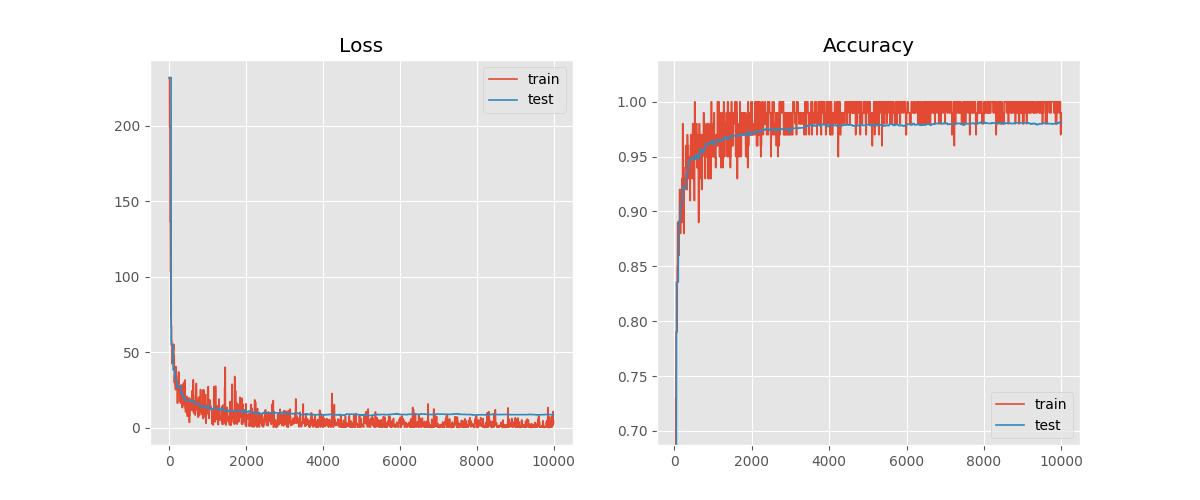

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
loss_plot_df.fillna(method='ffill').plot(ax = axes[0], linewidth=1.2, title='Loss')
acc_plot_df.fillna(method='ffill').plot(ax = axes[1], linewidth=1.2, title='Accuracy')

In [40]:
sess.close()

## CNN initialisation

In [94]:
sess.close()

In [95]:
tf.reset_default_graph()

In [96]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1]) # None is the batch size (100 in this case), (28x28 images), 1 is the value per pixel (grayscale so 1)
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10]) # one hot encoded labels

In [97]:
K, L, M, N = 200, 100, 60, 30

In [98]:
# number of output channels in each layer
K = 4
L = 8
M = 12
# Dense fully connected layer
N = 200

In [99]:
W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1)) # 5,5 is filter size, 1 is num of input channels, K is num of output channels
B1 = tf.Variable(tf.ones([K])/10)
W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
B2 = tf.Variable(tf.ones([L])/10)
W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
B3 = tf.Variable(tf.ones([M])/10)

#Dense layers

W4 = tf.Variable(tf.truncated_normal([7*7*M, N], stddev=0.1))
B4 = tf.Variable(tf.ones([N])/10)
W5 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1)) #last softmax layer
B5 = tf.Variable(tf.zeros([10])/10)

In [100]:
stride = 1 #output remains same 28x28
Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1) #X: input image batch X[100, 28, 28, 1]
stride = 2 #output is 14x14
Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
stride = 2
Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3) # middle 2 elements of stride array indicates by how much to move the filter

In [101]:
# shape of Y3 - Y3[100, 7, 7, 12]
# flatten all values for a fully connected layer
YY = tf.reshape(Y3, shape=[-1, 7 * 7 * M])
# shape of YY - YY[100, 7*7*12]
Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

#rest of the training process remains same

In [102]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [103]:
# accuracy in batch
is_correct = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1)) #one hot decoding
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [104]:
# decayed learning rate
# the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/2000)), i.e. exponential decay from 0.003->0.0001
step = tf.placeholder(tf.int32)
lr = 0.0001 + tf.train.exponential_decay(0.003, step, 2000, 1/math.e)
optimizer = tf.train.AdamOptimizer(lr)
train_step = optimizer.minimize(cross_entropy)

In [108]:
# Call this function in a loop to train the model, 100 images at a time
def training_step(i, update_test_data, update_train_data):

    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values for visualisation
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y, step: i}) # X and Y_ are what we previously defined as placeholders
        acc_plot_df.iloc[i,0] = a
        loss_plot_df.iloc[i,0] = c
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values for visualisation
    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels, step: i})
        acc_plot_df.iloc[i,1] = a
        loss_plot_df.iloc[i,1] = c
        print(str(i) + ": ********* epoch " + str(i*100//mnist.train.images.shape[0]+1) + " ********* test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y, step:i})

In [109]:
# init
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [111]:
acc_plot_df = pd.DataFrame(index=range(1000+1), columns=['train','test'])
loss_plot_df = pd.DataFrame(index=range(1000+1), columns=['train','test'])
for i in range(1000+1):
    training_step(i, i % 50 == 0, i % 10 == 0)

0: accuracy:0.98 loss: 6.702625
0: ********* epoch 1 ********* test accuracy:0.9784 test loss: 6.993347
10: accuracy:0.94 loss: 11.57781
20: accuracy:0.95 loss: 15.314609
30: accuracy:0.97 loss: 7.3868103
40: accuracy:0.97 loss: 11.732997
50: accuracy:0.95 loss: 14.376012
50: ********* epoch 1 ********* test accuracy:0.9789 test loss: 6.458628
60: accuracy:0.98 loss: 4.9250135
70: accuracy:0.98 loss: 13.23474
80: accuracy:0.95 loss: 17.559162
90: accuracy:0.98 loss: 7.179568
100: accuracy:0.98 loss: 8.310304
100: ********* epoch 1 ********* test accuracy:0.9795 test loss: 6.231563
110: accuracy:0.99 loss: 3.5579848
120: accuracy:0.98 loss: 5.265309
130: accuracy:0.99 loss: 7.0654073
140: accuracy:0.96 loss: 9.610185
150: accuracy:1.0 loss: 2.8815603
150: ********* epoch 1 ********* test accuracy:0.9825 test loss: 5.6216264
160: accuracy:0.96 loss: 6.1373987
170: accuracy:0.98 loss: 10.138271
180: accuracy:1.0 loss: 1.9203557
190: accuracy:0.98 loss: 6.6339016
200: accuracy:0.97 loss: 9

<IPython.core.display.Javascript object>


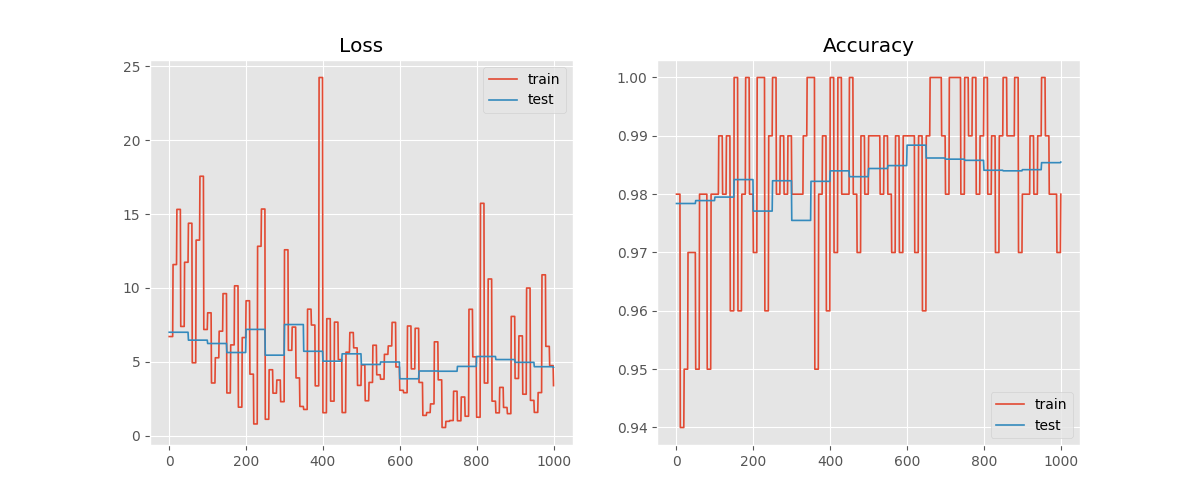

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
loss_plot_df.fillna(method='ffill').plot(ax = axes[0], linewidth=1.2, title='Loss')
acc_plot_df.fillna(method='ffill').plot(ax = axes[1], linewidth=1.2, title='Accuracy')

## if we see overfitting with this CNN configuration, we make bigger filters and add dropout to dense layer

In [ ]:
# three convolutional layers with their channel counts, and a
# fully connected layer (the last layer has 10 softmax neurons)
K = 6  # first convolutional layer output depth
L = 12  # second convolutional layer output depth
M = 24  # third convolutional layer
N = 200  # fully connected layer

In [ ]:
Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
YY4 = tf.nn.dropout(Y4, pkeep)
Ylogits = tf.matmul(YY4, W5) + B5
Y = tf.nn.softmax(Ylogits)

In [15]:
#allweights = tf.reshape(W, [-1])
#allbiases = tf.reshape(b, [-1])
#I = tensorflowvisu.tf_format_mnist_images(X, Y, Y_)  # assembles 10x10 images by default
#It = tensorflowvisu.tf_format_mnist_images(X, Y, Y_, 1000, lines=25)  # 1000 images on 25 lines